# Logistic Regression using synthetic dataset
## Importing necessary libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification 
from sklearn.datasets import make_multilabel_classification 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Creating a sunthetic dataset using make_classification( )
The make classification function outputs a dataset that is zero mean and follows a normal distribution (Almost)

In [12]:
n_feats = 5
n_info = 3
n_red = 2
X,Y = make_classification(n_samples = 500,n_features = n_feats,n_informative = n_info,n_redundant = n_red,n_classes = 2)
X = pd.DataFrame(X,columns = [("Feature "+str(i)) for i in range(n_feats)])
Y = pd.DataFrame(Y,columns = ["Target"])

## Some sttisitical moments of the generated synthetic dataset
As clearly seen the mean is almost zero. Standard devitation is close to one <br>
Median tends towards the mean suggesting a normal distribution

In [13]:
X.describe()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.314355,-0.057021,-0.552251,0.263267,0.008945
std,1.671402,1.590960,1.403836,1.329336,1.306744
min,-4.790194,-4.660259,-4.421715,-3.634927,-3.883874
25%,-1.209932,-1.275445,-1.572630,-0.560785,-0.953796
50%,-0.589767,-0.110014,-0.660264,0.226331,0.446958
75%,0.124906,1.113223,0.415545,1.087818,1.000323
max,5.289434,3.991898,3.223464,5.307200,2.183283


## Class distribution of the generated data. 
### Data has a uniform class distribution
750 in each

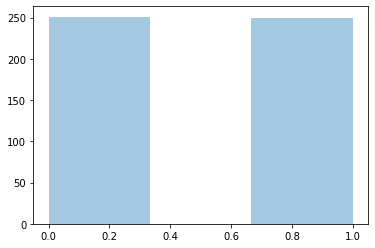

In [4]:
sns.distplot(Y,kde = False,bins = 3)

## Generating another dataset using make_multilabel_classification( )
This generates a more unrelated dataset. The values are more deiscrete unlike the smoother version of the previous function <br>
### Multi-Class vs Multi-Label
Multi class assumes an exclusivity among the members. If a sample is of one class, it cannot be a part of any other. This is essentially what multi-class means. <br><br><br>
Multi label does not have this assumption. A document (for example) can be categorized into multiple genres and hence be a part of mutiple classes.<br><br><br>
A more detailed explanation can be found at scikit-learn: <a href = "https://scikit-learn.org/stable/modules/multiclass.html">Click Here</a>


In [5]:
mX,mY = make_multilabel_classification(n_samples = 500,n_features = 5,n_classes = 3,n_labels = 2)
mX = pd.DataFrame(mX,columns = [("Feature "+str(i)) for i in range(5)])
mY = pd.DataFrame(mY,columns = ["Class "+str(i) for i in range(3)])

## Viewing some sample data

In [6]:
mX.head()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4
0,9.0,15.0,13.0,7.0,9.0
1,12.0,8.0,10.0,6.0,8.0
2,10.0,9.0,0.0,13.0,13.0
3,7.0,7.0,9.0,6.0,5.0
4,10.0,6.0,6.0,8.0,8.0


## Viewing Target data
We have 2 power (number of classes) possible classes that can be made if we decide to use it as a mutliclass dataset. <br>
This is precisely the reason Logistic Regression does not inherently support multi label classification.

In [10]:
mY.head()

,Class 0,Class 1,Class 2
0,0,1,0
1,0,1,0
2,1,0,1
3,1,1,0
4,0,1,1


In [8]:
mY.describe()

,Class 0,Class 1,Class 2
count,500.000000,500.000000,500.000000
mean,0.566000,0.522000,0.512000
std,0.496121,0.500016,0.500357
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


## Exploring the distribution of the data
As is clear form the statistics. The data is not scaled or normalized. It has arbitrary mean.<br>
The standard deviation is also arbitrary. <br><br>
Arbitrary here means that there is no apparent connection that we can draw at inital glance. The data is generated based on the class labels (Mutli label) arguments that are given.

In [257]:
mX.describe()

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.524000,6.812000,9.462000,10.390000,16.850000
std,4.713582,3.597017,4.447034,4.531995,5.534687
min,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.000000,4.000000,7.000000,7.000000,13.000000
50%,6.000000,7.000000,10.000000,10.000000,17.000000
75%,9.000000,9.000000,12.000000,13.000000,21.000000
max,24.000000,21.000000,20.000000,30.000000,33.000000


## Graphical distribution analysis
### 1. Row 1 is make_classification ( )
### 2. Row 2 is make_mutlilabel_classification( ) 

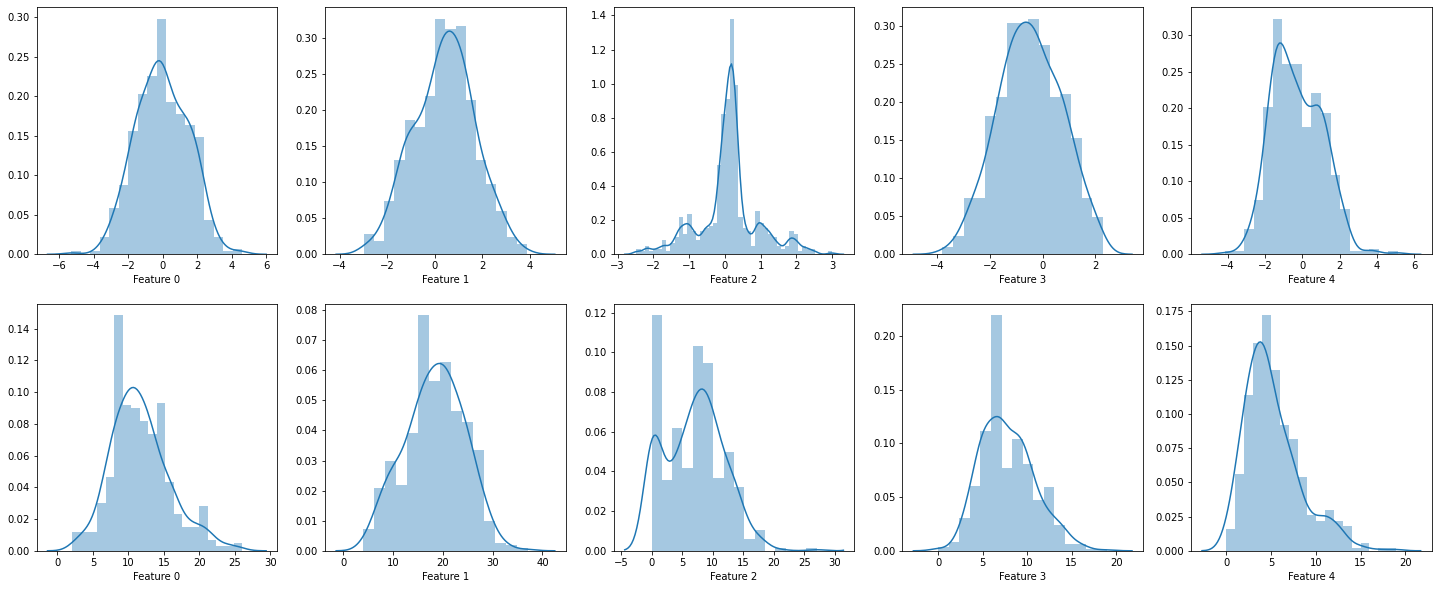

In [194]:
fig,axs = plt.subplots(nrows = 2,ncols = 5,figsize = [25,10])
for i,col in zip(range(5),X.columns):
    sns.distplot(X[col],ax = axs[0,i])
    sns.distplot(mX[col],ax = axs[1,i])

## Multivariate analysis of data
As can be clearly seen two features from X(make_classification ( )) have observable correlation because we have added two redundant features.

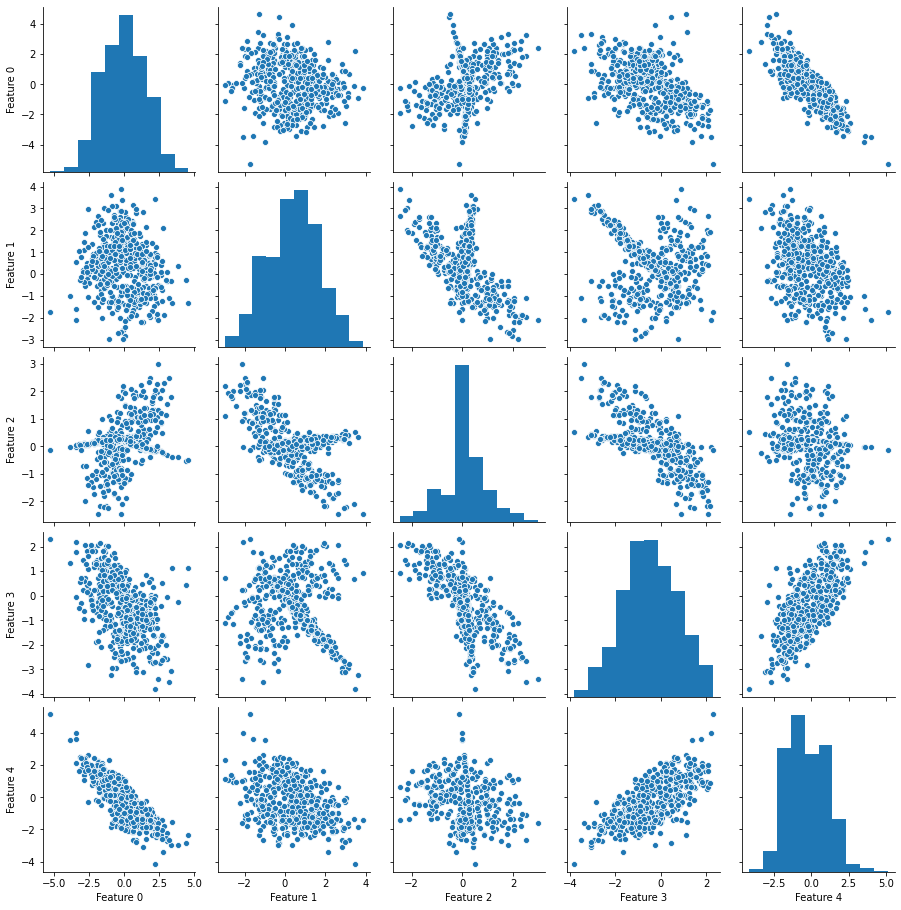

In [195]:
sns.pairplot(X)

The other generated set has more discrete value that are clearly visible and no apparent correlation is visible (Yet)

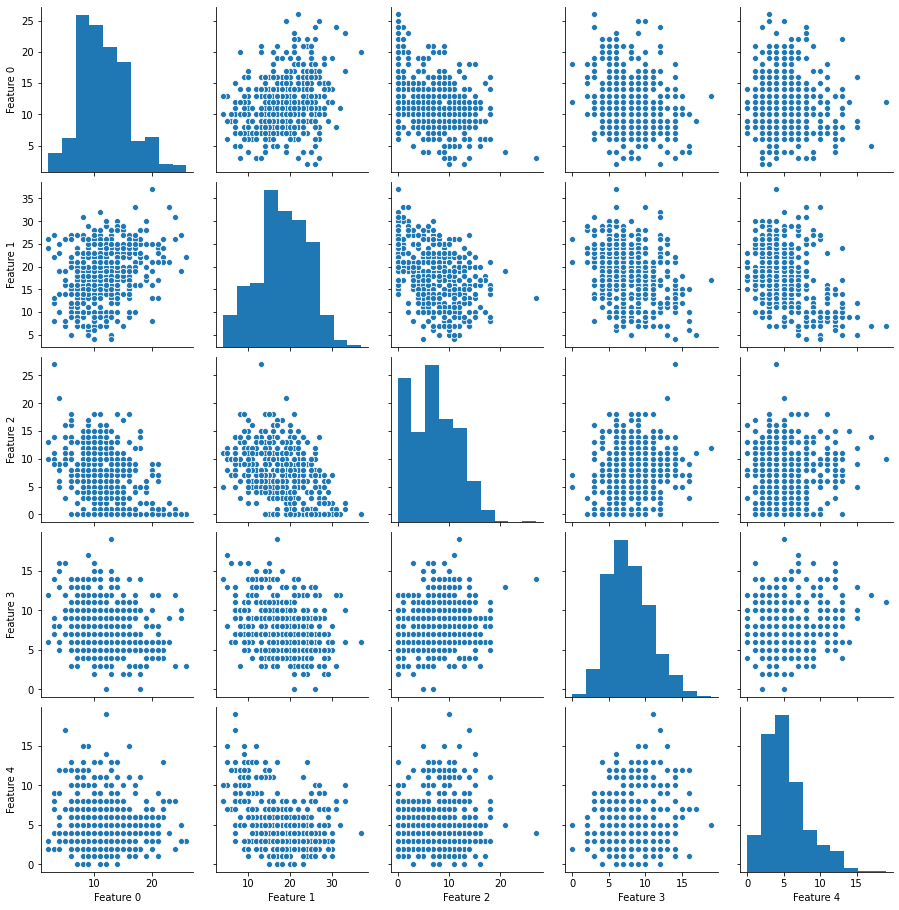

In [237]:
sns.pairplot(mX)

## Splitting into train and test set
Shuffle is False to show the effect of redundant features

In [196]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,shuffle = False)

## Fitting a  regression model onto all features of data
The results are displayed

In [197]:
model = LogisticRegression(multi_class = "auto")
model.fit(X_train,Y_train.values.ravel())
print(model.score(X_test,Y_test)*100,"% Accuracy")
conf = confusion_matrix(model.predict(X_test),Y_test)

88.0 % Accuracy


## Fitting another regression model, this time, only on 3 informative features
Results have improved slightly

In [198]:
model_2 = LogisticRegression(multi_class = "auto")
model_2.fit(X_train.iloc[:,0:3].copy(),Y_train.values.ravel())
print(model_2.score(X_test.iloc[:,0:3],Y_test)*100,"% Accuracy")
conf_2 = confusion_matrix(model_2.predict(X_test.iloc[:,0:3]),Y_test)

89.0 % Accuracy


## The confusion matrix of model trained with all features (left) and only informative features (right)

Text(0.5, 24.0, 'Model with 3 features')

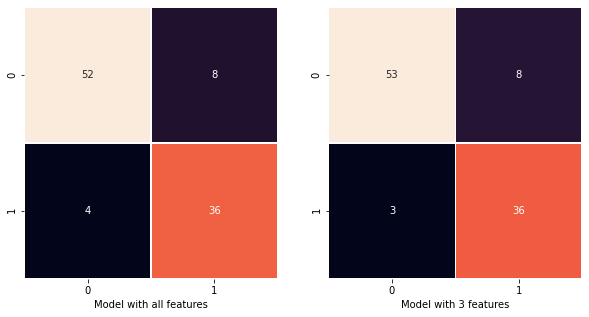

In [199]:
fig, axs = plt.subplots(ncols = 2,figsize = (10,5))
sns.heatmap(conf,annot = True,cbar = False,ax = axs[0],linewidth = 0.5)
axs[0].set_xlabel("Model with all features")
sns.heatmap(conf_2,annot = True,cbar = False,ax = axs[1],linewidth = 0.5)
axs[0].set_xlabel("Model with all features")
axs[1].set_xlabel("Model with 3 features")

## Logistic Regression is capable of classifiying multiclass 
Although multiple models are trained (Binary). <br>
A one vs all approach is used here. Does not inherently support multiclass modelling

In [235]:
n_feats = 20
n_info = 17
n_red = 3
X,Y = make_classification(n_samples = 1500,n_features = n_feats,n_informative = n_info,n_redundant = n_red,n_classes = 3)
X = pd.DataFrame(X,columns = [("Feature "+str(i)) for i in range(n_feats)])
Y = pd.DataFrame(Y,columns = ["Target"])

In [236]:
model = LogisticRegression(multi_class = "multinomial")
model.fit(X,Y.values.ravel())
print(model.score(X,Y)*100,"% Accuracy")
conf = confusion_matrix(model.predict(X),Y)

77.66666666666666 % Accuracy


## Plotting decision boundary
A decision boundary can be plotted using the co-efficients generated from the model. But  amore interesting method can be to use a numpy grid and use the model to output the probability of the class at that point in the grid. Plot this grid using matplotlib. Instead of ending up withna line , we're getting a gradient of the probability of the class across the grid. The centre (White) region of this plot is the approximate decision boundary. Logistic regression uses a 0.5 threshold be default.

In [239]:
n_feats = 2
n_info = 2
n_red = 0
X,Y = make_classification(n_samples = 1500,n_features = n_feats,n_informative = n_info,n_redundant = n_red,n_classes = 2)
X = pd.DataFrame(X,columns = [("Feature "+str(i)) for i in range(n_feats)])
Y = pd.DataFrame(Y,columns = ["Target"])
model = LogisticRegression(multi_class = "multinomial")
model.fit(X,Y.values.ravel())
print(model.score(X,Y)*100,"% Accuracy")
conf = confusion_matrix(model.predict(X),Y)

88.46666666666667 % Accuracy


[(-5.0, 5.0), Text(0, 0.5, '$X_2$'), (-5.0, 5.0), Text(0.5, 0, '$X_1$'), None]

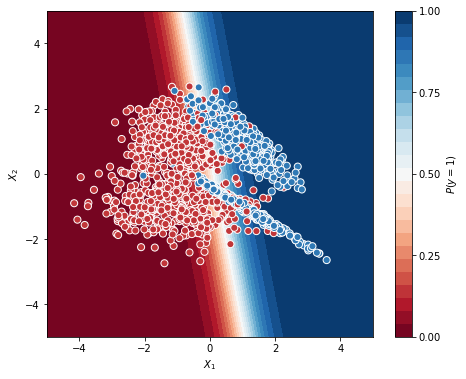

In [245]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X.iloc[:,0], X.iloc[:,1], c=Y.iloc[:,0], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

<center> <h2>End of Notebook<h2> </center>